In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
data = pd.read_csv('./train.csv')
X_test = pd.read_csv('./test.csv')

### Exploratory Data Analysis

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualizaing the data

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

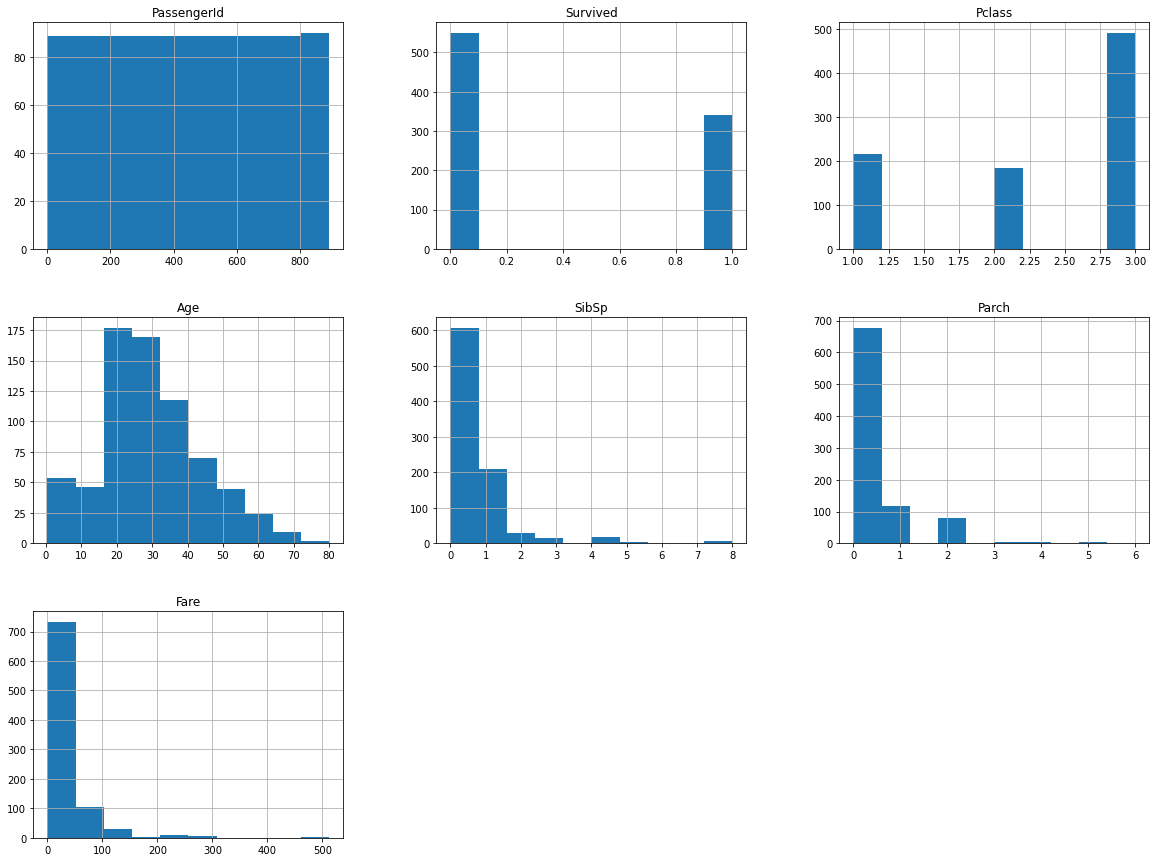

In [6]:
data.hist(figsize=(20, 15), bins=10)

In [13]:
X_train = data.copy().sample(frac=1) # randomly shuffled data

In [18]:
X_train_num = X_train[['Age', 'Fare']] # numerical attribs
X_train_cat = X_train.drop(['Survived', 'Age', 'Name', 'Cabin',  'PassengerId', 'Ticket', 'Fare'], axis=1) # categorical attribs
y_train = X_train['Survived'].copy()

In [16]:
print('categorical attr:\n{}\n\nnumerical attr:\n{}'.format(X_train_cat, X_train_num))

categorical attr:
     Pclass     Sex  SibSp  Parch Embarked
411       3    male      0      0        Q
418       2    male      0      0        S
257       1  female      0      0        S
480       3    male      5      2        S
544       1    male      1      0        C
..      ...     ...    ...    ...      ...
706       2  female      0      0        S
390       1    male      1      2        S
100       3  female      0      0        S
806       1    male      0      0        S
245       1    male      2      0        Q

[891 rows x 5 columns]

numerical attr:
      Age      Fare
411   NaN    6.8583
418  30.0   13.0000
257  30.0   86.5000
480   9.0   46.9000
544  50.0  106.4250
..    ...       ...
706  45.0   13.5000
390  36.0  120.0000
100  28.0    7.8958
806  39.0    0.0000
245  44.0   90.0000

[891 rows x 2 columns]


##### Looking for correlations 

In [11]:
corr_mat = data.corr()

In [12]:
corr_mat['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

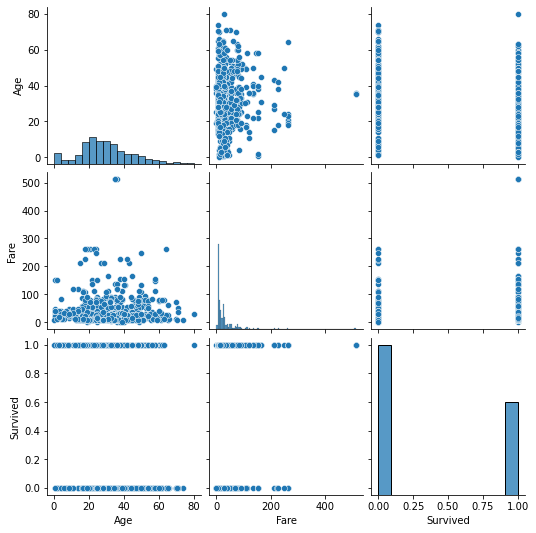

In [22]:
attri = list(X_train_num) + ['Survived']
sns.pairplot(X_train[attri])

### Data cleaning & preparation

######  Numerical attirbs

In [24]:
imp_most_freq = SimpleImputer(strategy='most_frequent')

In [25]:
imp_most_freq.fit(X_train_num)

SimpleImputer(strategy='most_frequent')

In [26]:
imp_most_freq.statistics_

array([24.  ,  8.05])

In [48]:
X_train_num_transformed = imp_most_freq.transform(X_train_num)

###### Feature scaling

In [50]:
X_train_num_transformed = MinMaxScaler().fit_transform(X_train_num_transformed)

In [53]:
X_train_num_transformed

array([[0.2963056 , 0.01338651],
       [0.37170143, 0.02537431],
       [0.37170143, 0.16883676],
       ...,
       [0.34656949, 0.01541158],
       [0.48479517, 0.        ],
       [0.54762503, 0.1756683 ]])

######  Categorical attribs

In [37]:
# handle missing value 
X_train_cat['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(X_train_cat[['Embarked']])

In [38]:
cat_encoder = OneHotEncoder()
X_train_cat_transformed = cat_encoder.fit_transform(X_train_cat)

In [43]:
print('{}\n\n{}'.format(X_train_cat_transformed.toarray().shape, X_train_cat_transformed.toarray()))

(891, 22)

[[0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


###### categories


In [40]:
cat_encoder.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 8]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array(['C', 'Q', 'S'], dtype=object)]

### Transformation Pipeline

In [66]:
num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='most_frequent')),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder())
])

print(num_pipeline.fit_transform(X_train_num))

[[-0.3461881  -0.51033193]
 [ 0.1086274  -0.38667072]
 [ 0.1086274   1.09322879]
 ...
 [-0.04297777 -0.48944219]
 [ 0.79085065 -0.64842165]
 [ 1.16986357  1.16370019]]


In [67]:
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', cat_pipeline, cat_attribs)
                                  ])

In [92]:
full_pipeline.fit(X_train)
X_train_prep = full_pipeline.transform(X_train)
print('{}\n\n{}'.format(X_train_prep.shape, X_train_prep))


(891, 24)

  (0, 0)	-0.3461881014312153
  (0, 1)	-0.5103319284071769
  (0, 4)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 14)	1.0
  (0, 22)	1.0
  (1, 0)	0.10862739908886059
  (1, 1)	-0.3866707201133388
  (1, 3)	1.0
  (1, 6)	1.0
  (1, 7)	1.0
  (1, 14)	1.0
  (1, 23)	1.0
  (2, 0)	0.10862739908886059
  (2, 1)	1.093228788100527
  (2, 2)	1.0
  (2, 5)	1.0
  (2, 7)	1.0
  (2, 14)	1.0
  (2, 23)	1.0
  (3, 0)	-1.483226852731405
  (3, 1)	0.2958951755118318
  (3, 4)	1.0
  (3, 6)	1.0
  :	:
  (887, 6)	1.0
  (887, 8)	1.0
  (887, 16)	1.0
  (887, 23)	1.0
  (888, 0)	-0.04297776775116471
  (888, 1)	-0.4894421904510968
  (888, 4)	1.0
  (888, 5)	1.0
  (888, 7)	1.0
  (888, 14)	1.0
  (888, 23)	1.0
  (889, 0)	0.7908506498689745
  (889, 1)	-0.6484216535389205
  (889, 2)	1.0
  (889, 6)	1.0
  (889, 7)	1.0
  (889, 14)	1.0
  (889, 23)	1.0
  (890, 0)	1.1698635669690376
  (890, 1)	1.163700193253568
  (890, 2)	1.0
  (890, 6)	1.0
  (890, 9)	1.0
  (890, 14)	1.0
  (890, 22)	1.0


###  Model Selection

###### Logistic Regression

In [71]:
log_reg = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(full_pipeline.transform(X_train), y_train)

LogisticRegression(max_iter=1000)

In [97]:
print('accuracy score: {}'.format(log_reg.score(full_pipeline.transform(X_train), y_train)))

accuracy score: 0.8125701459034792


In [160]:
scores = cross_val_score(log_reg, X_train_prep, y_train, cv=3, scoring='accuracy')
print('validation accuracy scores:{}\nvalidation accuracy: {}'.format(scores, scores.mean()))

validation accuracy scores:[0.78787879 0.79461279 0.82491582]
validation accuracy: 0.8024691358024691


###### Random Forest and Decision Tree

In [96]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prep, y_train)
print('accuracy score: {}'.format(tree_clf.score(X_train_prep, y_train)))

accuracy score: 0.9809203142536476


In [157]:
scores = cross_val_score(tree_clf, X_train_prep, y_train, cv=3, scoring='accuracy')
print('validation accuracy scores:{}\nvalidation accuracy: {}'.format(scores, scores.mean()))

validation accuracy scores:[0.78451178 0.77777778 0.75084175]
validation accuracy: 0.7710437710437711


In [99]:
forest_reg = RandomForestClassifier()
forest_reg.fit(X_train_prep, y_train)
print('accuracy score: {}'.format(forest_reg.score(X_train_prep, y_train)))

accuracy score: 0.9809203142536476


In [158]:
scores = cross_val_score(forest_reg, X_train_prep, y_train, cv=3, scoring='accuracy')
print('validation accuracy scores:{}\nvalidation accuracy: {}'.format(scores, scores.mean()))

validation accuracy scores:[0.8047138  0.79461279 0.79124579]
validation accuracy: 0.7968574635241302


### Fine tuning the model

In [100]:
# hyperparameters
params_logreg = {'solver':['lbfgs', 'liblinear', 'newton-cg']}
params_tree = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]}, 
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]}
]


##### Logistic regression 

In [102]:
log_reg_CV= GridSearchCV(log_reg, params_logreg, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True
                        )
log_reg_CV.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             return_train_score=True, scoring='neg_mean_squared_error')

###### results

In [104]:
log_reg_CV.best_score_

-0.19640323896804973

In [117]:
for mean_score, params in zip(log_reg_CV.cv_results_['mean_test_score'], log_reg_CV.cv_results_['params']):
    print(np.sqrt(-mean_score), params)

0.4431740504226863 {'solver': 'lbfgs'}
0.44569513449152875 {'solver': 'liblinear'}
0.4431740504226863 {'solver': 'newton-cg'}


In [108]:
log_reg_CV_results = pd.DataFrame(log_reg_CV.cv_results_)

In [109]:
log_reg_CV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020026,0.003571,0.000354,0.000022,lbfgs,{'solver': 'lbfgs'},-0.201117,-0.207865,-0.219101,-0.202247,...,-0.196403,0.023249,1,-0.18118,-0.182328,-0.189341,-0.185133,-0.213184,-0.190233,0.011815
1,0.001609,0.000175,0.000269,0.000022,liblinear,{'solver': 'liblinear'},-0.206704,-0.207865,-0.219101,-0.207865,...,-0.198644,0.023911,3,-0.18118,-0.182328,-0.190743,-0.185133,-0.213184,-0.190514,0.011807
2,0.021987,0.001633,0.000355,0.000057,newton-cg,{'solver': 'newton-cg'},-0.201117,-0.207865,-0.219101,-0.202247,...,-0.196403,0.023249,1,-0.18118,-0.182328,-0.189341,-0.185133,-0.213184,-0.190233,0.011815


In [123]:
log_reg_model = log_reg_CV.best_estimator_

#####  Trees classifier

In [112]:
forest_reg_CV = GridSearchCV(forest_reg, params_tree, cv=5,
                             scoring='neg_mean_squared_error',
                             return_train_score=True)

forest_reg_CV.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

###### results

In [116]:
for mean_score, params in zip(forest_reg_CV.cv_results_['mean_test_score'], forest_reg_CV.cv_results_['params']):
    print(np.sqrt(-mean_score), params)

0.47731148185034306 {'max_features': 2, 'n_estimators': 3}
0.4642177134639431 {'max_features': 2, 'n_estimators': 10}
0.46423799575571467 {'max_features': 2, 'n_estimators': 30}
0.466598211693539 {'max_features': 4, 'n_estimators': 3}
0.45322272032918304 {'max_features': 4, 'n_estimators': 10}
0.45072285172999754 {'max_features': 4, 'n_estimators': 30}
0.461790964054577 {'max_features': 6, 'n_estimators': 3}
0.4495026160607506 {'max_features': 6, 'n_estimators': 10}
0.4495095982460467 {'max_features': 6, 'n_estimators': 30}
0.47383355188077836 {'max_features': 8, 'n_estimators': 3}
0.45690566808680266 {'max_features': 8, 'n_estimators': 10}
0.45320194506753114 {'max_features': 8, 'n_estimators': 30}
0.48895913630071536 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.47850671617165386 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4701964245636737 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.46423799575571467 {'bootstrap': False, 'max_features

In [114]:
forest_reg_CV.best_params_

{'max_features': 6, 'n_estimators': 10}

In [115]:
forest_reg_CV.best_score_

-0.20205260184545856

In [122]:
forest_reg_model = forest_reg_CV.best_estimator_

### Performance on Test set

In [141]:
# replaced the category 9 class with the closest category
X_test['Parch'].replace(9, 6, inplace=True)

In [142]:
X_test_prep = full_pipeline.transform(X_test)

In [146]:
logreg_pred = log_reg_model.predict(X_test_prep)
forestreg_pred = forest_reg_model.predict(X_test_prep)

In [150]:
sub = pd.read_csv('./gender_submission.csv')

In [147]:
logreg_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [149]:
logreg_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020026,0.003571,0.000354,0.000022,lbfgs,{'solver': 'lbfgs'},-0.201117,-0.207865,-0.219101,-0.202247,...,-0.196403,0.023249,1,-0.18118,-0.182328,-0.189341,-0.185133,-0.213184,-0.190233,0.011815
1,0.001609,0.000175,0.000269,0.000022,liblinear,{'solver': 'liblinear'},-0.206704,-0.207865,-0.219101,-0.207865,...,-0.198644,0.023911,3,-0.18118,-0.182328,-0.190743,-0.185133,-0.213184,-0.190514,0.011807
2,0.021987,0.001633,0.000355,0.000057,newton-cg,{'solver': 'newton-cg'},-0.201117,-0.207865,-0.219101,-0.202247,...,-0.196403,0.023249,1,-0.18118,-0.182328,-0.189341,-0.185133,-0.213184,-0.190233,0.011815


In [179]:
sub = X_test[['PassengerId']]

In [184]:
sub['Survived'] = logreg_pred

/var/folders/c6/hmrnwnyd77197y43v6pf4gjc0000gn/T/ipykernel_46573/830903567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Survived'] = logreg_pred


In [185]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [186]:
sub.to_csv('logistic_reg_results.csv', index=False)